In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

In [2]:
iris = pd.read_csv('iris.csv')
wine = pd.read_csv('wine.csv')

In [3]:
p1 = iris.iloc[:,1:5].to_numpy()
Lable = iris.iloc[:,0].to_numpy()
Lable_iris = []

for i in Lable:
    if i == 'Iris-setosa':
        Lable_iris.append(1)
    elif i == 'Iris-versicolor':
        Lable_iris.append(2)
    else:
        Lable_iris.append(3)


In [4]:
p2 = wine.iloc[:,1:12].to_numpy()
Lable = wine.iloc[:,0].to_numpy()
Lable_wine = []

for i in Lable:
    if i == 1:
        Lable_wine.append(1)
    elif i == 2:
        Lable_wine.append(2)
    else:
        Lable_wine.append(3)

In [5]:
def hardlim(x):
    if x >= 0:
        y = 1
    else:
        y = -1
    return y

def logsig(x):
    y = 1/(1+ np.exp(-x))
    return y

In [6]:
def cal(pattern, weight, bias, label):
    
    v = []
    er = []
    ao_list1 = []
    ao_list2 = []

    for i in pattern:
        patternT = i.T
        net = np.dot(weight, patternT) + bias
        v.append(net)

    for i in v:
        ao = hardlim(i)
        ao_list1.append(ao)
    
    for i in v:
        ao = logsig(i)
        ao_list2.append(ao)

    for i in range(0,len(ao_list2)):
        err = label[i] - ao_list2[i]
        er.append(err)

    er = np.array(er)
    erT = er.T
    sse = np.dot(er,erT)
    return sse

In [7]:
Plt_values = []
for i in range(0,140):
    w = np.random.rand(4)
    b = np.random.rand()
    sse = cal(p1, w, b, Lable_iris)
    avg_w = np.average(w)
    value = np.array([avg_w,b,sse])
    Plt_values.append(value)
Plt_values = np.array(Plt_values)
Plt_values = pd.DataFrame(Plt_values)
print(sse)

250.8248432751887


/var/folders/80/pw4k9yx11bn2l9rhw7d3s0qc0000gn/T/ipykernel_85201/2300422873.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


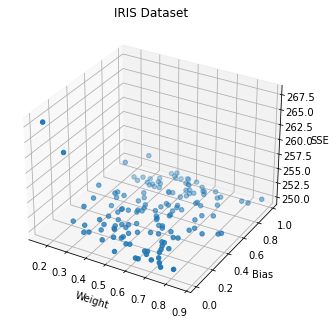

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
plt.title('IRIS Dataset')
x = Plt_values.iloc[:,0]
y = Plt_values.iloc[:,1]
z = Plt_values.iloc[:,2]
ax.scatter(x,y,z)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('SSE')
plt.show()

In [9]:
Plt_values = []
for i in range(0,150):
    w = np.random.rand(11)
    b = np.random.rand()
    sse = cal(p2, w, b, Lable_wine)
    avg_w = np.average(w)
    value = np.array([avg_w,b,sse])
    Plt_values.append(value)
Plt_values = np.array(Plt_values)
Plt_values = pd.DataFrame(Plt_values)
print(sse)


263.00000000000136


/var/folders/80/pw4k9yx11bn2l9rhw7d3s0qc0000gn/T/ipykernel_85201/176653503.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


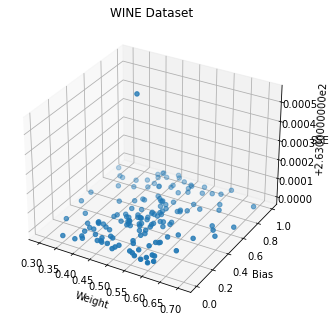

In [10]:
fig = plt.figure()
ax = Axes3D(fig)
plt.title('WINE Dataset')
x = Plt_values.iloc[:,0]
y = Plt_values.iloc[:,1]
z = Plt_values.iloc[:,2]
ax.scatter(x,y,z)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('SSE')
plt.show()